# WSU Impact Assessment Examples

This notebook provides examples of some calculations that can be done using the data bases estimating the properties of WSU data based on current data taken in cycles 7 and 8. This data base does NOT include data from Band 1 and Band 2, which will be the most challenging use cases because they are the lowest frequencies

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import QTable, vstack
from importlib import reload
import re

## Read in files

Reading in using ecsv and QTable is recommended to get unit information.

In [49]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20230109.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20230109.ecsv')

Take a look at the tables. Note that the values that should have units do have units indicated.

In [50]:
result_c7_mous

mous,proposal_id,array,nant_typical,nant_array,nant_all,band,ntarget,s_fov,s_resolution,mosaic,imsize,pb,cell,blc_npol,blc_nspw,blc_specwidth,blc_freq,blc_velres,blc_nchan_agg,blc_nchan_max,blc_bandwidth_max,blc_bandwidth_agg,wsu_freq,wsu_npol,wsu_bandwidth_early,wsu_bandwidth_later_2x,wsu_bandwidth_later_4x,wsu_bandwidth_spw,wsu_nspw_early,wsu_nspw_later_2x,wsu_nspw_later_4x,wsu_specwidth_finest,wsu_chanavg_finest,wsu_velres_finest,wsu_specwidth_stepped,wsu_chanavg_stepped,wsu_velres_stepped,wsu_specwidth_stepped2,wsu_chanavg_stepped2,wsu_velres_stepped2,wsu_tint,wsu_nchan_spw_finest,wsu_nchan_spw_stepped,wsu_nchan_spw_stepped2,wsu_frac_bw_early,wsu_frac_bw_later_2x,wsu_frac_bw_later_4x,wsu_frac_bw_spw,nbase_typical,nbase_array,nbase_all,Project code,Array,L80,blc_tint,bp_time,flux_time,phase_time,pol_time,check_time,target_time_tot,time_tot,cal_time,mfssize,wsu_cubesize_stepped2,wsu_productsize_early_stepped2,wsu_datarate_early_stepped2_typical,wsu_visrate_early_stepped2_typical,wsu_datavol_early_stepped2_typical_target_tot,wsu_datavol_early_stepped2_typical_cal,wsu_datavol_early_stepped2_typical_total,wsu_nvis_early_stepped2_typical_target_tot,wsu_nvis_early_stepped2_typical_cal,wsu_nvis_early_stepped2_typical_total,wsu_productsize_later_2x_stepped2,wsu_datarate_later_2x_stepped2_typical,wsu_visrate_later_2x_stepped2_typical,wsu_datavol_later_2x_stepped2_typical_target_tot,wsu_datavol_later_2x_stepped2_typical_cal,wsu_datavol_later_2x_stepped2_typical_total,wsu_nvis_later_2x_stepped2_typical_target_tot,wsu_nvis_later_2x_stepped2_typical_cal,wsu_nvis_later_2x_stepped2_typical_total,wsu_productsize_later_4x_stepped2,wsu_datarate_later_4x_stepped2_typical,wsu_visrate_later_4x_stepped2_typical,wsu_datavol_later_4x_stepped2_typical_target_tot,wsu_datavol_later_4x_stepped2_typical_cal,wsu_datavol_later_4x_stepped2_typical_total,wsu_nvis_later_4x_stepped2_typical_target_tot,wsu_nvis_later_4x_stepped2_typical_cal,wsu_nvis_later_4x_stepped2_typical_total,blc_datarate_typical,blc_visrate_typical,blc_datavol_typical_target_tot,blc_datavol_typical_cal,blc_datavol_typical_total,blc_nvis_typical_target_tot,blc_nvis_typical_cal,blc_nvis_typical_total,plversion,procedure,nant,totaltime,imgtime,cubetime,aggtime,fctime,nEB,npt,nscan,reptgt,allowedcubesize,allowedcubelimit,predcubesize,mitigatedcubesize,allowedprodsize,initialprodsize,mitigatedprodsize,mitigated,mit_nbins,mit_hm_imsize,mit_hm_cell,mit_field,mit_spw
,,,,,,,,deg,arcsec,,,arcsec,arcsec,,,kHz,GHz,km / s,,,GHz,GHz,GHz,,GHz,GHz,GHz,GHz,,,,kHz,,km / s,kHz,,km / s,kHz,,km / s,s,,,,,,,,,,,,,m,s,s,s,s,s,s,s,s,s,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,,,,h,h,h,h,h,,,,,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,,,,,,
str22,str14,str3,int64,int64,int64,float64,float64,float64,float64,str1,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str14,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str20,object,float64,float64,float64,float64,float64,object,object,object,str29,float64,float64,float64,float64,float64,float64,float64,object,str64,str7,str7,str846,str54
uid://A001/X1465/X1002,2019.1.01326.S,7m,10,12,16,3.0,1.0,0.13050363616709187,12.418751976046456,T,220.0,108.514167152526,2.483750395209291,2,4,96

In [51]:
result_c7_mous.columns

<TableColumns names=('mous','proposal_id','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','Project code','Array','L80','blc_tint','bp_time','flux_time','phase_time','pol_time','check_time','target_time_tot','time_tot

In [52]:
result_c8_mous

mous,proposal_id,array,nant_typical,nant_array,nant_all,band,ntarget,s_fov,s_resolution,mosaic,imsize,pb,cell,blc_npol,blc_nspw,blc_specwidth,blc_freq,blc_velres,blc_nchan_agg,blc_nchan_max,blc_bandwidth_max,blc_bandwidth_agg,wsu_freq,wsu_npol,wsu_bandwidth_early,wsu_bandwidth_later_2x,wsu_bandwidth_later_4x,wsu_bandwidth_spw,wsu_nspw_early,wsu_nspw_later_2x,wsu_nspw_later_4x,wsu_specwidth_finest,wsu_chanavg_finest,wsu_velres_finest,wsu_specwidth_stepped,wsu_chanavg_stepped,wsu_velres_stepped,wsu_specwidth_stepped2,wsu_chanavg_stepped2,wsu_velres_stepped2,wsu_tint,wsu_nchan_spw_finest,wsu_nchan_spw_stepped,wsu_nchan_spw_stepped2,wsu_frac_bw_early,wsu_frac_bw_later_2x,wsu_frac_bw_later_4x,wsu_frac_bw_spw,nbase_typical,nbase_array,nbase_all,Project code,Array,L80,blc_tint,bp_time,flux_time,phase_time,pol_time,check_time,target_time_tot,time_tot,cal_time,mfssize,wsu_cubesize_stepped2,wsu_productsize_early_stepped2,wsu_datarate_early_stepped2_typical,wsu_visrate_early_stepped2_typical,wsu_datavol_early_stepped2_typical_target_tot,wsu_datavol_early_stepped2_typical_cal,wsu_datavol_early_stepped2_typical_total,wsu_nvis_early_stepped2_typical_target_tot,wsu_nvis_early_stepped2_typical_cal,wsu_nvis_early_stepped2_typical_total,wsu_productsize_later_2x_stepped2,wsu_datarate_later_2x_stepped2_typical,wsu_visrate_later_2x_stepped2_typical,wsu_datavol_later_2x_stepped2_typical_target_tot,wsu_datavol_later_2x_stepped2_typical_cal,wsu_datavol_later_2x_stepped2_typical_total,wsu_nvis_later_2x_stepped2_typical_target_tot,wsu_nvis_later_2x_stepped2_typical_cal,wsu_nvis_later_2x_stepped2_typical_total,wsu_productsize_later_4x_stepped2,wsu_datarate_later_4x_stepped2_typical,wsu_visrate_later_4x_stepped2_typical,wsu_datavol_later_4x_stepped2_typical_target_tot,wsu_datavol_later_4x_stepped2_typical_cal,wsu_datavol_later_4x_stepped2_typical_total,wsu_nvis_later_4x_stepped2_typical_target_tot,wsu_nvis_later_4x_stepped2_typical_cal,wsu_nvis_later_4x_stepped2_typical_total,blc_datarate_typical,blc_visrate_typical,blc_datavol_typical_target_tot,blc_datavol_typical_cal,blc_datavol_typical_total,blc_nvis_typical_target_tot,blc_nvis_typical_cal,blc_nvis_typical_total,plversion,procedure,nant,totaltime,imgtime,cubetime,aggtime,fctime,nEB,npt,nscan,reptgt,allowedcubesize,allowedcubelimit,predcubesize,mitigatedcubesize,allowedprodsize,initialprodsize,mitigatedprodsize,mitigated,mit_nbins,mit_hm_imsize,mit_hm_cell,mit_field,mit_spw
,,,,,,,,deg,arcsec,,,arcsec,arcsec,,,kHz,GHz,km / s,,,GHz,GHz,GHz,,GHz,GHz,GHz,GHz,,,,kHz,,km / s,kHz,,km / s,kHz,,km / s,s,,,,,,,,,,,,,m,s,s,s,s,s,s,s,s,s,Gbyte,Gbyte,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,Gbyte / s,Gvis / h,Gbyte,Gbyte,Gbyte,Gvis,Gvis,Gvis,,,,h,h,h,h,h,,,,,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,Gbyte,,,,,,
str22,str14,str3,int64,int64,int64,float64,float64,float64,float64,str1,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str14,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str20,object,float64,float64,float64,float64,float64,object,object,object,str29,float64,float64,float64,float64,float64,float64,float64,object,str64,str7,str7,str769,str44
uid://A001/X158f/X115,2021.1.01571.S,12m,47,54,66,7.0,1.0,0.0045375135989717905,0.2911647419354411,F,430.0,16.331349317037823,0.05823294838708822,

In [53]:
result_c8_mous.columns

<TableColumns names=('mous','proposal_id','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','Project code','Array','L80','blc_tint','bp_time','flux_time','phase_time','pol_time','check_time','target_time_tot','time_tot

## Properties of WSU data products

In [54]:
# biggest c7 cube
np.max(result_c7_mous['wsu_cubesize_stepped2'])

<Quantity 14090.3916876 Gbyte>

In [55]:
# biggest c8 cube
np.max(result_c8_mous['wsu_cubesize_stepped2'])

<Quantity 4547.3934384 Gbyte>

C7 had long baselines and C8 didn't, so C7 has a larger max cube size

In [56]:
# biggest c7, 7m cube
idx = result_c7_mous['array'] == '7m'
np.max(result_c7_mous['wsu_cubesize_stepped2'][idx])

<Quantity 41.8131504 Gbyte>

In [57]:
# sum of all c7, 7m products in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_productsize_early_stepped2'][idx]).to('PB')

<Quantity 0.02610853 Pbyte>

In [58]:
# sum of all c7 wsu products in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_productsize_early_stepped2']).to('PB')

<Quantity 7.98282997 Pbyte>

In [59]:
# sum of all c7 wsu products in "later 2x" WSU -- all bands have 2x BW
np.sum(result_c7_mous['wsu_productsize_later_2x_stepped2']).to('PB')

<Quantity 9.19493325 Pbyte>

In [60]:
# sum of all c7 wsu products in "later 4x" WSU -- all bands have 4x BW
np.sum(result_c7_mous['wsu_productsize_later_4x_stepped2']).to('PB')

<Quantity 18.38986649 Pbyte>

In [61]:
# total number of cubes produced in "early" WSU -- only bands 6, 8, 9, and 10 have 2x BW
np.sum(result_c7_mous['wsu_nspw_early'] * result_c7_mous['ntarget'])

79900.0

In [62]:
# total number of cubes produced in "later 2x" WSU -- all bands have 2x BW
np.sum(result_c7_mous['wsu_nspw_later_2x'] * result_c7_mous['ntarget'])

102160.0

In [63]:
# total number of cubes produced today
np.sum(result_c7_mous['blc_nspw'] * result_c7_mous['ntarget'])

43750.0

## Calibration time scaling

Text(0.5, 0, 'total pipeline time (h)')

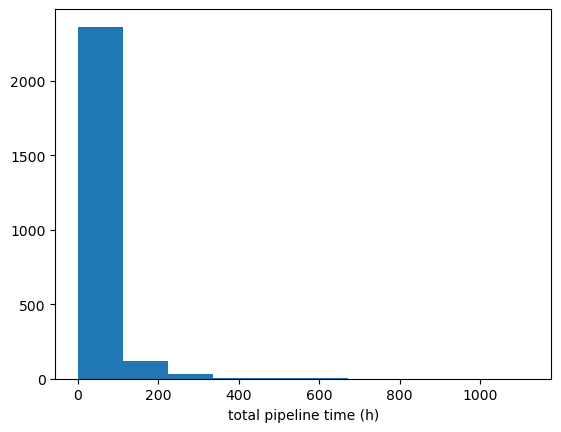

In [64]:
plt.hist(result_c7_mous['totaltime'].value)
plt.xlabel('total pipeline time (h)')

Text(0.5, 0, 'total imaging pipeline time (h)')

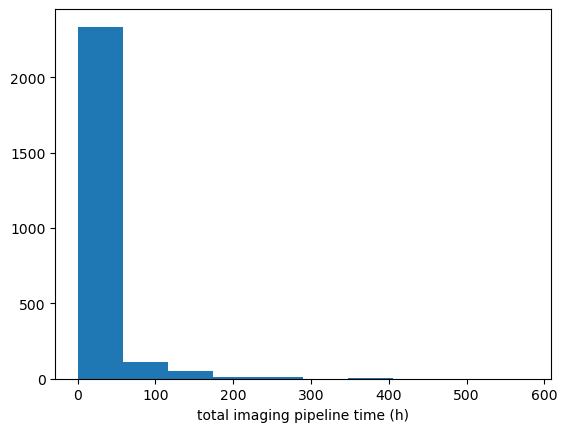

In [65]:
plt.hist(result_c7_mous['imgtime'].value)
plt.xlabel('total imaging pipeline time (h)')

In [66]:
result_c7_mous['pl_caltime'] = result_c7_mous['totaltime'] - result_c7_mous['imgtime']

(array([2.437e+03, 6.400e+01, 1.900e+01, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.51111111e-01, 6.41879722e+01, 1.28124833e+02, 1.92061694e+02,
        2.55998556e+02, 3.19935417e+02, 3.83872278e+02, 4.47809139e+02,
        5.11746000e+02, 5.75682861e+02, 6.39619722e+02]),
 <BarContainer object of 10 artists>)

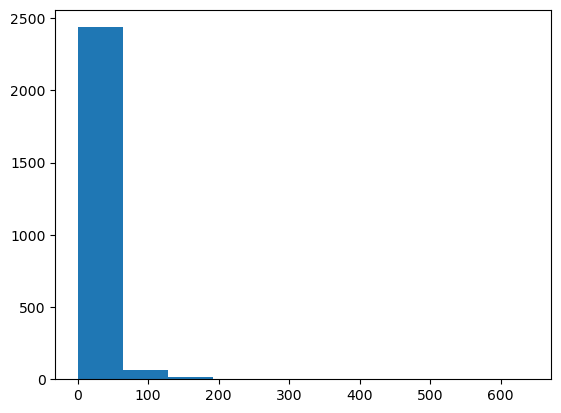

In [67]:
plt.hist(result_c7_mous['pl_caltime'].value)

## Date rates

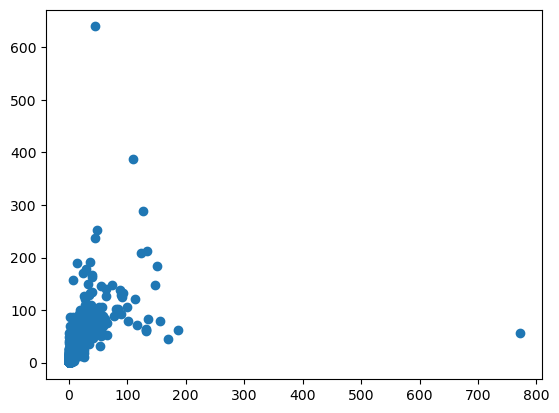

In [68]:
plt.scatter(result_c7_mous['blc_nvis_typical_cal'],result_c7_mous['pl_caltime'])
plt.scatter()

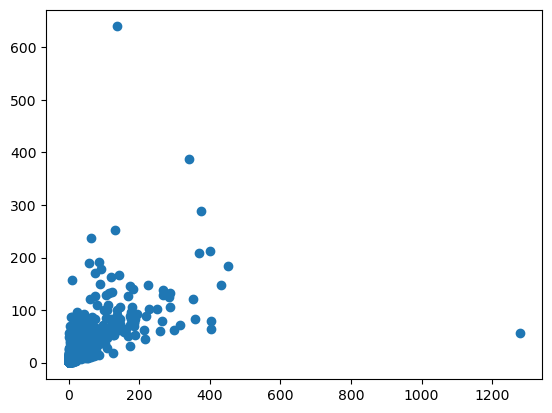

In [69]:
plt.scatter(result_c7_mous['blc_nvis_typical_total'],result_c7_mous['pl_caltime'])